## Load Experiment Data

In [1]:
# Load the policy
import os
import pandas
from garage.experiment import Snapshotter
import pandas as pd
EXPERIMENT_NAME = "CL_point_env_13"
experiment_dir = os.path.join("data/local/experiment", EXPERIMENT_NAME)
snapshotter = Snapshotter()
data = snapshotter.load(experiment_dir)
policy = data['algo'].policy

# You can also access other components of the experiment
env = data['env']

progress_csv_path = os.path.join(experiment_dir, 'progress.csv')
# progress_df = pd.read_csv(progress_csv_path)

2025-01-07 18:01:47.463587: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.




Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




/Users/paulnitschke/Desktop/projects/geo_meta_rl/garage/experiment/deterministic.py:36: UserWarning: Enabeling deterministic mode in PyTorch can have a performance impact when using GPU.
  warnings.warn(


In [2]:
num_train_tasks=2
from garage.experiment.task_sampler import SetTaskSampler
from garage.envs import GymEnv, normalize
from garage.envs.point_env import PointEnv
from garage.torch.algos.CLMeta import PEARLWorker

worker_args = dict(deterministic=True, accum_context=True)
env_sampler = SetTaskSampler(
    PointEnv,
    wrapper=lambda env, _: normalize(
        env))
env = env_sampler.sample(num_train_tasks)

In [15]:
from garage.experiment.meta_evaluator import MetaEvaluator

meta_evaluator = MetaEvaluator(test_tasks=env,
                               worker_class=PEARLWorker,
                               worker_args=worker_args,
                               n_exploration_eps=10,
                               n_test_tasks=2,
                               return_task_embeddings=True)

trajs, task_embeddings = meta_evaluator.evaluate(algo=data['algo'])



Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




/Users/paulnitschke/Desktop/projects/geo_meta_rl/garage/experiment/deterministic.py:36: UserWarning: Enabeling deterministic mode in PyTorch can have a performance impact when using GPU.
  warnings.warn(


Text(0.5, 1.0, 'Trajectories of Task 1 and Task 2')

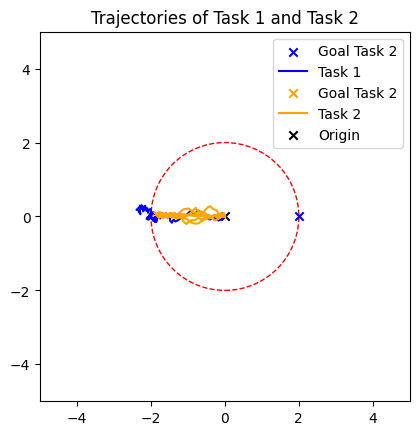

In [8]:
task_1_trajs, task_2_trajs = trajs

import matplotlib.pyplot as plt
plt.gca().set_aspect('equal', adjustable='box')
circle = plt.Circle((0, 0), 2, color='r', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.scatter(task_1_trajs.env_infos["task"][0]["goal"][0], task_1_trajs.env_infos["task"][0]["goal"][1], color='blue', marker='x', label='Goal Task 2')
plt.plot(task_1_trajs.observations[:,0], task_1_trajs.observations[:,1], label="Task 1", color="blue")
plt.scatter(task_2_trajs.env_infos["task"][0]["goal"][0], task_2_trajs.env_infos["task"][0]["goal"][1], color='orange', marker='x', label='Goal Task 2')
plt.plot(task_2_trajs.observations[:,0], task_2_trajs.observations[:,1], label="Task 2", color="orange")
plt.scatter(0, 0, color='black', marker='x', label='Origin')
plt.legend()
plt.title("Trajectories of Task 1 and Task 2")

## Visualizing Learned Q-Functions

In [5]:
dir(data["algo"])
qf1 = data["algo"]._qf1
qf2 = data["algo"]._qf2

task_1_trajs

EpisodeBatch(env_spec=EnvSpec(input_space=Box(-0.1, 0.1, (2,), float32), output_space=Box(-inf, inf, (3,), float32), max_episode_length=100), episode_infos={}, observations=array([[ 0.        ,  0.        ,  2.        ],
       [-0.09999948, -0.0857346 ,  2.10174885],
       [-0.19999916, -0.16247494,  2.20599057],
       [-0.29999896, -0.21695258,  2.31020857],
       [-0.39999871, -0.28766759,  2.41717737],
       [-0.49999846, -0.3597293 ,  2.52574691],
       [-0.59999812, -0.39450776,  2.62975789],
       [-0.69999793, -0.46755359,  2.7401816 ],
       [-0.79999772, -0.50436427,  2.84506073],
       [-0.89999751, -0.52325636,  2.94682588],
       [-0.99999719, -0.56211697,  3.05220554],
       [-1.09999701, -0.60876323,  3.15920467],
       [-1.19999686, -0.62864958,  3.2611624 ],
       [-1.29999673, -0.67856421,  3.3690396 ],
       [-1.39999654, -0.72928241,  3.47733078],
       [-1.49999634, -0.73527994,  3.57639637],
       [-1.59999613, -0.75937397,  3.67921472],
       [-1.